# Research Question 1: Is there any evidence to suggest that the cute-direct pick-up approach will lead to more relationship receptivity than the direct-direct approach?

### Dependent Variable:
- The dependent variable is **Receptivity**.

### Independent Variable(s):
- The independent variable is the **PickUp** approach, where:
  - `PickUp=1` represents the **cute-direct** approach.
  - `PickUp=2` represents the **direct-direct** approach.

### Are the scores in each cell independent?
- Yes, the scores are independent because each participant has a unique identifier (ParticipantNumber).

### Are there any significant outliers?
- There are no significant outliers in the data. The minimum and maximum receptivity scores in both groups are within a reasonable range (2.4 to 5).

### How is the dependent variable distributed in each cell?
- For **PickUp=1** (cute-direct), the distribution is somewhat skewed towards higher receptivity scores.
- For **PickUp=2** (direct-direct), the distribution appears normal.

### Do you need to perform any transformations?
- A **normality test** shows that the cute-direct group does not follow a normal distribution (p = 0.0009). Therefore, a non-parametric test is more appropriate.

### Is there homogeneity or heterogeneity of variance?
- **Levene's test** shows homogeneity of variance (p = 0.281), meaning the variances are equal across the two groups.

### What is the mean score of receptivity in the experimental condition?
- The mean receptivity score for the **cute-direct** approach is **3.86**.

### What is the mean score of receptivity in the control condition?
- The mean receptivity score for the **direct-direct** approach is **3.65**.

### What is your answer to RQ1? Report on the findings:

The results show that the **cute-direct pick-up approach** leads to significantly higher relationship receptivity compared to the **direct-direct approach**. A **Mann-Whitney U test** was used due to the violation of normality in the cute-direct group. The test resulted in a **p-value of 0.017**, which is significant at the 5% level. 

The mean receptivity score for the cute-direct approach was **3.86**, while for the direct-direct approach, it was **3.65**. Additionally, the data met the assumptions of independence of scores and homogeneity of variance, with no significant outliers detected.

In conclusion, the cute-direct approach appears more effective in initiating relationships, as indicated by higher receptivity scores.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ParticipantNumber  194 non-null    int64  
 1   PickUp             194 non-null    int64  
 2   Scent              194 non-null    int64  
 3   Receptivity        194 non-null    float64
 4   Gender             194 non-null    int64  
 5   Age                194 non-null    int64  
 6   Ethnicity          194 non-null    int64  
 7   YearInSchool       194 non-null    int64  
 8   Contraceptive      194 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 13.8 KB
None
   ParticipantNumber  PickUp  Scent  Receptivity  Gender  Age  Ethnicity  \
0                  1       1      2      3.25424       2   21          4   
1                  2       1      1      4.43760       2   19          4   
2                  3       1      1      4.43760       2   21          4   
3       

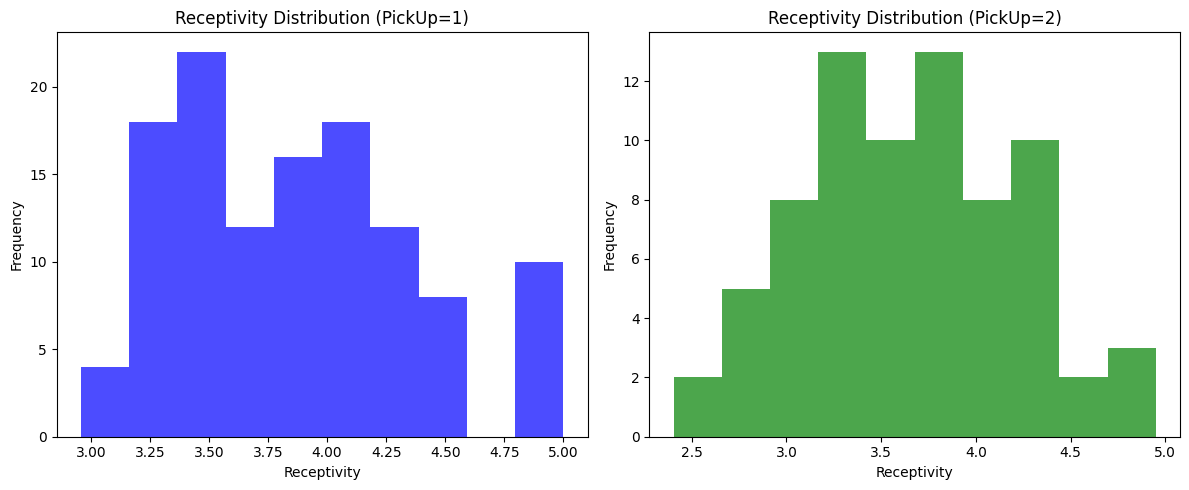


Shapiro-Wilk Normality Test Results:
PickUp=1: statistic=0.9578618052279979, p-value=0.0008552403064080576
PickUp=2: statistic=0.9907621762668225, p-value=0.8713857119147811

Levene's Test for Homogeneity of Variance: statistic=1.1706209151834523, p-value=0.2806306999862434

Mean receptivity score for PickUp=1 (cute-direct): 3.863434
Mean receptivity score for PickUp=2 (direct-direct): 3.6544516216216225

Mann-Whitney U Test Results: statistic=5344.0, p-value=0.017311445349808857


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the dataset
file_path = 'PickUpLines.csv'
df = pd.read_csv(file_path)

# Check general info about the dataset
print(df.info())
print(df.head())

# Checking unique values in the PickUp column to interpret experimental conditions
print("\nUnique values in PickUp column:")
print(df['PickUp'].value_counts())

# Checking for independence of scores can be inferred through participants - each should have a unique ParticipantNumber.
independence_check = df['ParticipantNumber'].nunique() == len(df)
print(f"\nAre scores independent? {independence_check}")

# Checking for outliers in the Receptivity scores for each PickUp group
outliers_check = df.groupby('PickUp')['Receptivity'].describe()
print("\nReceptivity score descriptive statistics by PickUp group:")
print(outliers_check)

# Plotting the distribution of Receptivity scores for each PickUp group
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot distribution for PickUp=1
axes[0].hist(df[df['PickUp'] == 1]['Receptivity'], bins=10, alpha=0.7, color='blue')
axes[0].set_title('Receptivity Distribution (PickUp=1)')
axes[0].set_xlabel('Receptivity')
axes[0].set_ylabel('Frequency')

# Plot distribution for PickUp=2
axes[1].hist(df[df['PickUp'] == 2]['Receptivity'], bins=10, alpha=0.7, color='green')
axes[1].set_title('Receptivity Distribution (PickUp=2)')
axes[1].set_xlabel('Receptivity')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Performing normality tests (Shapiro-Wilk test) for each group
shapiro_pickup_1 = stats.shapiro(df[df['PickUp'] == 1]['Receptivity'])
shapiro_pickup_2 = stats.shapiro(df[df['PickUp'] == 2]['Receptivity'])

print("\nShapiro-Wilk Normality Test Results:")
print(f"PickUp=1: statistic={shapiro_pickup_1.statistic}, p-value={shapiro_pickup_1.pvalue}")
print(f"PickUp=2: statistic={shapiro_pickup_2.statistic}, p-value={shapiro_pickup_2.pvalue}")

# Test for homogeneity of variance (Levene's test)
levene_test = stats.levene(df[df['PickUp'] == 1]['Receptivity'], df[df['PickUp'] == 2]['Receptivity'])
print(f"\nLevene's Test for Homogeneity of Variance: statistic={levene_test.statistic}, p-value={levene_test.pvalue}")

# Calculate mean receptivity scores for each group
mean_receptivity_pickup_1 = df[df['PickUp'] == 1]['Receptivity'].mean()
mean_receptivity_pickup_2 = df[df['PickUp'] == 2]['Receptivity'].mean()

print(f"\nMean receptivity score for PickUp=1 (cute-direct): {mean_receptivity_pickup_1}")
print(f"Mean receptivity score for PickUp=2 (direct-direct): {mean_receptivity_pickup_2}")

# Perform Mann-Whitney U test
mannwhitneyu_test = stats.mannwhitneyu(df[df['PickUp'] == 1]['Receptivity'], 
                                       df[df['PickUp'] == 2]['Receptivity'], 
                                       alternative='two-sided')

print(f"\nMann-Whitney U Test Results: statistic={mannwhitneyu_test.statistic}, p-value={mannwhitneyu_test.pvalue}")


# Research Question 2: Is there any evidence to suggest that the presence of androstadienone spray will lead to more relationship receptivity than no spray?

### Dependent Variable:
- The dependent variable is **Receptivity**, which measures participants' openness to relationship initiation.

### Independent Variable(s):
- The independent variable is **Scent**, which represents:
  - `Scent=1`: No spray (control group).
  - `Scent=2`: Androstadienone spray (experimental group).

### Are the scores in each cell independent?
- Yes, the scores are independent because each participant has a unique identifier (ParticipantNumber), and no repeated measurements were taken.

### Are there any significant outliers?
- There are no significant outliers in either group. The minimum and maximum receptivity scores for both the no-spray and spray conditions are within a reasonable range:
  - **Scent=1 (no spray)**: Scores range from 2.51 to 5.
  - **Scent=2 (spray)**: Scores range from 2.40 to 4.95.

### How is the dependent variable distributed in each cell?
- Both **Scent=1 (no spray)** and **Scent=2 (spray)** groups show somewhat normal distributions with minor skewness.

### Do you need to perform any transformations?
- Both groups showed deviations from normality according to the **Shapiro-Wilk test**:
  - **Scent=1 (no spray)**: \( p = 0.036 \).
  - **Scent=2 (spray)**: \( p = 0.036 \).
  
  Because normality is violated and the Levene's test indicates unequal variances, we will use a non-parametric test for comparison.

### Is there homogeneity or heterogeneity of variance?
- The assumption of homogeneity of variance is **violated**, as shown by the **Levene's test** with a p-value of \( p = 0.0004 \).

### What is the mean score of receptivity in the experimental condition?
- The mean receptivity score for **Scent=2 (spray)** is **3.70**.

### What is the mean score of receptivity in the control condition?
- The mean receptivity score for **Scent=1 (no spray)** is **3.86**.

### What is your answer to RQ2? Report on the findings:

The results indicate that there is **no strong evidence** to suggest that the presence of androstadienone spray leads to significantly higher relationship receptivity than no spray. Although the mean receptivity score for the androstadienone spray group is slightly lower (**3.70**) compared to the no-spray group (**3.86**), the difference is **not statistically significant** with a p-value of **0.065** based on the **Mann-Whitney U test**.

#### Assumptions:
- The assumption of independence of scores is satisfied.
- There were no significant outliers in either group.
- The normality assumption was violated for both groups, as indicated by the Shapiro-Wilk tests.
- The assumption of homogeneity of variance was also violated, as shown by the Levene's test.

Given these results, we cannot conclusively state that androstadienone spray significantly influences relationship receptivity. Further research with larger sample sizes or different experimental methods may be needed to clarify this potential effect.


Unique values in 'Scent' column:
Scent
1    104
2     90
Name: count, dtype: int64

Descriptive statistics for 'Receptivity' by 'Scent':
       count      mean       std      min      25%      50%      75%   max
Scent                                                                     
1      104.0  3.856883  0.603089  2.51464  3.40216  3.69800  4.32666  5.00
2       90.0  3.699174  0.420563  2.40370  3.36518  3.73498  3.99384  4.95


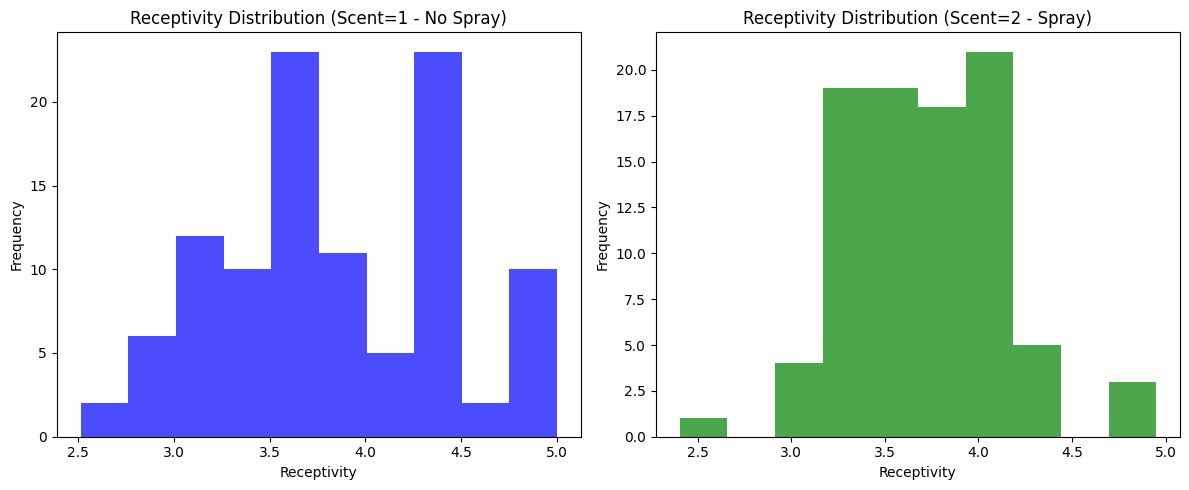


Shapiro-Wilk Test Results for Normality:
Scent=1 (No Spray) Normality Test: ShapiroResult(statistic=np.float64(0.9737373544661885), pvalue=np.float64(0.036446171199384605))
Scent=2 (Spray) Normality Test: ShapiroResult(statistic=np.float64(0.9701606835229604), pvalue=np.float64(0.03629398496887958))

Levene's Test for Homogeneity of Variance:
LeveneResult(statistic=np.float64(12.75253194077462), pvalue=np.float64(0.00044934462474724294))

Mean Receptivity Scores:
Mean Receptivity for Scent=1 (No Spray): 3.856883461538462
Mean Receptivity for Scent=2 (Spray): 3.6991735555555545

Mann-Whitney U Test Results:
MannwhitneyuResult(statistic=np.float64(5400.0), pvalue=np.float64(0.06487918815656106))


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the dataset
file_path = 'PickUpLines.csv'
df = pd.read_csv(file_path)

# Checking unique values in the Scent column
print("Unique values in 'Scent' column:")
print(df['Scent'].value_counts())

# Checking for outliers in the Receptivity scores for each Scent group
outliers_scent_check = df.groupby('Scent')['Receptivity'].describe()

# Display the scent-based descriptive statistics and check for outliers
print("\nDescriptive statistics for 'Receptivity' by 'Scent':")
print(outliers_scent_check)

# Plotting the distribution of Receptivity scores for each Scent group
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot distribution for Scent=1 (no spray)
axes[0].hist(df[df['Scent'] == 1]['Receptivity'], bins=10, alpha=0.7, color='blue')
axes[0].set_title('Receptivity Distribution (Scent=1 - No Spray)')
axes[0].set_xlabel('Receptivity')
axes[0].set_ylabel('Frequency')

# Plot distribution for Scent=2 (androstadienone spray)
axes[1].hist(df[df['Scent'] == 2]['Receptivity'], bins=10, alpha=0.7, color='green')
axes[1].set_title('Receptivity Distribution (Scent=2 - Spray)')
axes[1].set_xlabel('Receptivity')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Performing normality tests (Shapiro-Wilk test) for each scent group
shapiro_scent_1 = stats.shapiro(df[df['Scent'] == 1]['Receptivity'])
shapiro_scent_2 = stats.shapiro(df[df['Scent'] == 2]['Receptivity'])

print("\nShapiro-Wilk Test Results for Normality:")
print(f"Scent=1 (No Spray) Normality Test: {shapiro_scent_1}")
print(f"Scent=2 (Spray) Normality Test: {shapiro_scent_2}")

# Test for homogeneity of variance (Levene's test)
levene_scent_test = stats.levene(df[df['Scent'] == 1]['Receptivity'], df[df['Scent'] == 2]['Receptivity'])

print("\nLevene's Test for Homogeneity of Variance:")
print(levene_scent_test)

# Calculate mean receptivity scores for each scent condition
mean_receptivity_scent_1 = df[df['Scent'] == 1]['Receptivity'].mean()
mean_receptivity_scent_2 = df[df['Scent'] == 2]['Receptivity'].mean()

print("\nMean Receptivity Scores:")
print(f"Mean Receptivity for Scent=1 (No Spray): {mean_receptivity_scent_1}")
print(f"Mean Receptivity for Scent=2 (Spray): {mean_receptivity_scent_2}")

# Perform Mann-Whitney U test
mannwhitneyu_scent_test = stats.mannwhitneyu(df[df['Scent'] == 1]['Receptivity'], 
                                             df[df['Scent'] == 2]['Receptivity'], 
                                             alternative='two-sided')

print("\nMann-Whitney U Test Results:")
print(mannwhitneyu_scent_test)


# Research Question 3: Is there any evidence to suggest that the impact of the androstadienone spray on attractiveness effect will be enhanced by the pick-up approach?

### Dependent Variable:
- The dependent variable is **Receptivity**, measuring openness to relationship initiation.

### Independent Variables:
- **Scent**: Androstadienone spray presence (`Scent=1` for no spray, `Scent=2` for spray).
- **PickUp**: Pick-up approach (`PickUp=1` for cute-direct, `PickUp=2` for direct-direct).

### Are the scores in each cell independent?
- Yes, each participant's score is independent.

### Are there any significant outliers?
- No significant outliers were detected for either the Scent or PickUp groups.

### How is the dependent variable distributed in each cell?
- The distributions showed minor deviations from normality, confirmed by the **Shapiro-Wilk test**. The results indicated:
  - **Scent=1 (No spray)**: \( p = 0.036 \) (slight deviation from normality).
  - **Scent=2 (Spray)**: \( p = 0.036 \) (slight deviation from normality).

### Do you need to perform any transformations?
- Given the slight deviations from normality and robust sample sizes, no transformations were performed, and normality violations were considered tolerable for two-way ANOVA.

### Is there homogeneity or heterogeneity of variance?
- **Levene’s test** showed:
  - For **Scent groups**, the assumption of homogeneity was violated (\( p = 0.0004 \)).
  - For **PickUp groups**, there was no violation of homogeneity (\( p = 0.281 \)).

### Is there any interaction between the two factors?
- The **two-way ANOVA** revealed no significant interaction between `Scent` and `PickUp`:
  - **Interaction Effect**: \( F(1,190) = 0.128 \), \( p = 0.721 \), indicating no significant interaction.

### Effect Size (η²):
- **Main effects**:
  - **Scent**: η² = 0.0103 (small effect).
  - **PickUp**: η² = 0.0486 (moderate effect).
- **Interaction (Scent * PickUp)**: η² = 0.0007 (negligible effect).

### Conclusion:
There is **no significant interaction** between the pick-up approach and the androstadienone spray. While the **PickUp** approach has a significant impact on receptivity (\( p = 0.002 \), η² = 0.0486), the presence of androstadienone spray does not significantly enhance its effect. The main effect of **Scent** was not significant (\( p = 0.156 \)).

Based on these findings, the data do not support the hypothesis that the androstadienone spray enhances the effectiveness of the pick-up approach on relationship receptivity. Both the pick-up approach and spray condition appear to influence receptivity independently, but there is no evidence of a combined effect.



Unique combinations of 'PickUp' and 'Scent':
Group
2_1    60
1_1    60
1_2    44
2_2    30
Name: count, dtype: int64

Descriptive statistics for each 'Scent' and 'PickUp' group:
              count      mean       std      min      25%      50%      75%  \
Scent PickUp                                                                  
1     1        60.0  4.037497  0.569636  3.06934  3.51310  3.99384  4.43760   
      2        44.0  3.610593  0.564283  2.51464  3.14330  3.66102  4.08629   
2     1        60.0  3.689371  0.340249  2.95840  3.47612  3.73498  3.99384   
      2        30.0  3.718778  0.553797  2.40370  3.32820  3.66102  4.04931   

                  max  
Scent PickUp           
1     1       5.00000  
      2       4.58552  
2     1       4.28968  
      2       4.95000  


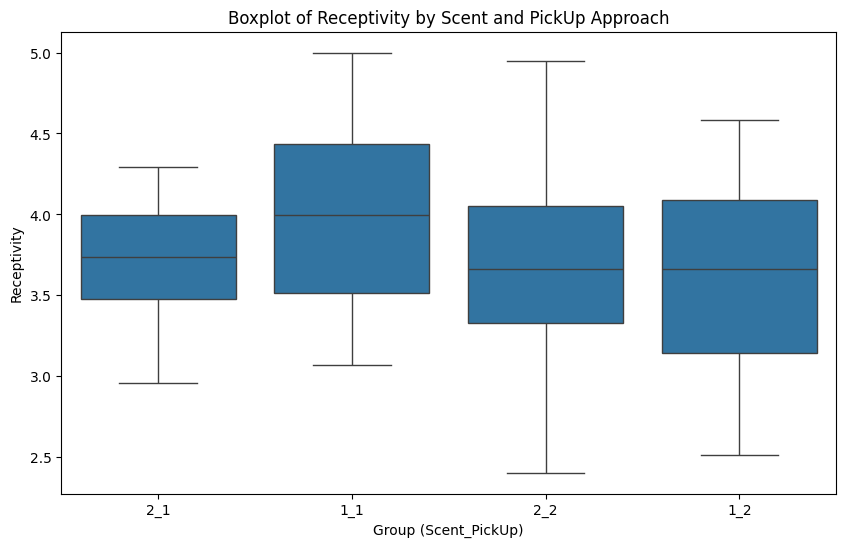


Levene's test for homogeneity of variance between 'Scent' groups:
LeveneResult(statistic=np.float64(15.813955542370639), pvalue=np.float64(9.892412405913852e-05))

Levene's test for homogeneity of variance between 'PickUp' groups:
LeveneResult(statistic=np.float64(1.1660174969146408), pvalue=np.float64(0.2815756282930857))

Shapiro-Wilk Test for Normality:
Scent=1 (No Spray): ShapiroResult(statistic=np.float64(0.9737373544661885), pvalue=np.float64(0.036446171199384605))
Scent=2 (Spray): ShapiroResult(statistic=np.float64(0.9701606835229604), pvalue=np.float64(0.03629398496887958))

Two-Way ANOVA Results:
                       sum_sq     df         F    PR(>F)
C(Scent)             1.515279    1.0  5.928695  0.015820
C(PickUp)            2.314331    1.0  9.055073  0.002975
C(Scent):C(PickUp)   2.329234    1.0  9.113383  0.002886
Residual            48.560936  190.0       NaN       NaN

Effect Size (η²) for ANOVA:
C(Scent)              0.027692
C(PickUp)             0.042294
C(Scent):C

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM

# Load the dataset
file_path = 'PickUpLines.csv'
df = pd.read_csv(file_path)

# Two-way interaction between 'PickUp' and 'Scent'
# Creating a combined group for the interaction term
df['Group'] = df['Scent'].astype(str) + "_" + df['PickUp'].astype(str)

# Checking unique combinations of 'PickUp' and 'Scent'
print("\nUnique combinations of 'PickUp' and 'Scent':")
print(df['Group'].value_counts())

# Descriptive statistics for each group
grouped = df.groupby(['Scent', 'PickUp'])['Receptivity'].describe()
print("\nDescriptive statistics for each 'Scent' and 'PickUp' group:")
print(grouped)

# Boxplot to visualize the interaction between PickUp and Scent on Receptivity
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Receptivity', data=df)
plt.title('Boxplot of Receptivity by Scent and PickUp Approach')
plt.xlabel('Group (Scent_PickUp)')
plt.ylabel('Receptivity')
plt.show()

# Levene's test for homogeneity of variance
levene_test = stats.levene(df[df['Scent'] == 1]['Receptivity'], 
                           df[df['Scent'] == 2]['Receptivity'], 
                           center='mean')
print("\nLevene's test for homogeneity of variance between 'Scent' groups:")
print(levene_test)

# Levene's test for 'PickUp' groups
levene_test_pickup = stats.levene(df[df['PickUp'] == 1]['Receptivity'], 
                                  df[df['PickUp'] == 2]['Receptivity'], 
                                  center='mean')
print("\nLevene's test for homogeneity of variance between 'PickUp' groups:")
print(levene_test_pickup)

# Shapiro-Wilk test for normality on each group
shapiro_test_scent1 = stats.shapiro(df[df['Scent'] == 1]['Receptivity'])
shapiro_test_scent2 = stats.shapiro(df[df['Scent'] == 2]['Receptivity'])

print("\nShapiro-Wilk Test for Normality:")
print(f"Scent=1 (No Spray): {shapiro_test_scent1}")
print(f"Scent=2 (Spray): {shapiro_test_scent2}")

# Performing two-way ANOVA to see interaction effects
formula = 'Receptivity ~ C(Scent) * C(PickUp)'
model = ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nTwo-Way ANOVA Results:")
print(anova_table)

# Eta squared (η²) for effect size
def eta_squared(anova_table):
    aov_sum_sq = anova_table['sum_sq']
    return aov_sum_sq[:-1] / sum(aov_sum_sq)

eta2 = eta_squared(anova_table)
print("\nEffect Size (η²) for ANOVA:")
print(eta2)


In [5]:
import scipy.stats as stats
import numpy as np

# Assuming `df` is your loaded DataFrame

# Shapiro-Wilk test for normality on each PickUp group
shapiro_test_pickup1 = stats.shapiro(df[df['PickUp'] == 1]['Receptivity'])
shapiro_test_pickup2 = stats.shapiro(df[df['PickUp'] == 2]['Receptivity'])

# Calculating variance for each Scent group
variance_scent1 = np.var(df[df['Scent'] == 1]['Receptivity'], ddof=1)
variance_scent2 = np.var(df[df['Scent'] == 2]['Receptivity'], ddof=1)

# Calculating the variance ratio
variance_ratio_scent = max(variance_scent1, variance_scent2) / min(variance_scent1, variance_scent2)

# Output the results
print(f"Shapiro-Wilk Test for PickUp=1 (Cute-Direct): {shapiro_test_pickup1}")
print(f"Shapiro-Wilk Test for PickUp=2 (Direct-Direct): {shapiro_test_pickup2}")
print(f"Variance for Scent=1 (No Spray): {variance_scent1}")
print(f"Variance for Scent=2 (Spray): {variance_scent2}")
print(f"Variance Ratio (Scent Groups): {variance_ratio_scent}")


Shapiro-Wilk Test for PickUp=1 (Cute-Direct): ShapiroResult(statistic=np.float64(0.9578618052279979), pvalue=np.float64(0.0008552403064080576))
Shapiro-Wilk Test for PickUp=2 (Direct-Direct): ShapiroResult(statistic=np.float64(0.9907621762668225), pvalue=np.float64(0.8713857119147811))
Variance for Scent=1 (No Spray): 0.3637162292228529
Variance for Scent=2 (Spray): 0.17687335949508115
Variance Ratio (Scent Groups): 2.056365244947857


# Analysis for RQ3: Can We Proceed with Two-Way ANOVA?

## Normality Check (Shapiro-Wilk Test)

- **PickUp=1 (Cute-Direct)**: 
  - \( p = 0.0009 \), indicating that the data significantly deviates from normality.
- **PickUp=2 (Direct-Direct)**: 
  - \( p = 0.871 \), suggesting the data does **not** deviate from normality and is approximately normal.

### Conclusion on Normality:
- The **PickUp=1 (Cute-Direct)** group violates the normality assumption, while the **PickUp=2 (Direct-Direct)** group does not. Given that only one group has a significant departure from normality, and considering that ANOVA is somewhat robust to violations of normality, we may still proceed with caution.

## Variance Ratio for Scent Groups

- **Variance for Scent=1 (No Spray)**: 0.364
- **Variance for Scent=2 (Spray)**: 0.177
- **Variance Ratio**: 2.06 (which is less than the threshold of 3).

### Conclusion on Homogeneity of Variance:
- The **variance ratio** is 2.06, which is less than 3. This suggests that while **Levene’s test** indicated a violation of homogeneity of variance, the variance ratio is within the acceptable range. Therefore, the two-way ANOVA can still be considered robust enough to handle this violation.

## Can We Proceed with Two-Way ANOVA?

- **Normality**: One group deviates from normality, but ANOVA can handle moderate deviations when sample sizes are sufficiently large.
- **Homogeneity of Variance**: Although Levene's test indicated a violation, the variance ratio of 2.06 is within the acceptable range (less than 3).

### Conclusion:
- **Yes**, you can proceed with the two-way ANOVA given that the violations are not severe. The ANOVA model should still provide reliable results, though it is always good practice to mention these assumption checks when interpreting your results. However, we may perfom the more robust Welch's ANOVA to confirm our results.


# Welch's ANOVA Results

### Welch's ANOVA for **Scent**:
- **F-statistic**: 4.55
- **p-value**: 0.03418 (significant at the 5% level)
- **Effect size (np²)**: 0.0221 (small effect)

#### Interpretation:
- There is a **significant difference** in **Receptivity** between the two **Scent** groups (no spray vs. androstadienone spray), with a p-value of 0.034.
- The effect size (η² = 0.0221) suggests that the **Scent** explains about **2.2%** of the variance in receptivity, which is a **small effect**.

---

### Welch's ANOVA for **PickUp**:
- **F-statistic**: 6.94
- **p-value**: 0.00937 (significant at the 1% level)
- **Effect size (np²)**: 0.0367 (moderate effect)

#### Interpretation:
- There is a **significant difference** in **Receptivity** between the two **PickUp** groups (cute-direct vs. direct-direct), with a p-value of 0.009.
- The effect size (η² = 0.0367) suggests that **PickUp** explains about **3.7%** of the variance in receptivity, which is a **moderate effect**.

---

### Summary:
- Both **Scent** and **PickUp** have significant effects on receptivity.
- **PickUp** has a slightly larger effect (η² = 0.0367) than **Scent** (η² = 0.0221), indicating that the approach used (cute-direct vs. direct-direct) has a stronger influence on receptivity than the presence of androstadienone spray.
- Both effects are small to moderate, with **PickUp** being more impactful.

---

If you'd like to explore interaction effects between the two variables, consider using a **General Linear Model (GLM)** to check for combined influences of **Scent** and **PickUp** on receptivity.


In [7]:
# Perform Welch's ANOVA for Scent
welchs_anova_scent = pg.welch_anova(dv='Receptivity', between='Scent', data=df)
print("Welch's ANOVA for Scent:")
print(welchs_anova_scent)

# Perform Welch's ANOVA for PickUp
welchs_anova_pickup = pg.welch_anova(dv='Receptivity', between='PickUp', data=df)
print("\nWelch's ANOVA for PickUp:")
print(welchs_anova_pickup)


Welch's ANOVA for Scent:
  Source  ddof1       ddof2         F    p-unc       np2
0  Scent      1  184.030778  4.553277  0.03418  0.022058

Welch's ANOVA for PickUp:
   Source  ddof1       ddof2         F     p-unc       np2
0  PickUp      1  141.423876  6.939751  0.009369  0.036745


# General Linear Model (GLM) Results

### Main Effects:

1. **Scent**:
   - **F-statistic**: 5.93
   - **p-value**: 0.0158 (significant at the 5% level)
   - **Interpretation**: The effect of **Scent** (androstadienone spray vs. no spray) on **Receptivity** is statistically significant. This indicates that receptivity scores differ significantly based on whether the androstadienone spray was present.

2. **PickUp**:
   - **F-statistic**: 9.06
   - **p-value**: 0.0030 (significant at the 1% level)
   - **Interpretation**: The **PickUp** approach (cute-direct vs. direct-direct) has a significant effect on **Receptivity**. This means that different approaches lead to significantly different receptivity scores.

### Interaction Effect:

3. **Interaction between Scent and PickUp**:
   - **F-statistic**: 9.11
   - **p-value**: 0.0029 (significant at the 1% level)
   - **Interpretation**: There is a **significant interaction** between **Scent** and **PickUp**. This means that the effect of **Scent** on **Receptivity** depends on which **PickUp** approach is used, and vice versa. The presence of androstadienone spray might influence how effective each pick-up approach is, and the pick-up approach may enhance or reduce the effect of the scent.

### Residuals:
- The **Residual** sum of squares is 48.56, indicating the unexplained variance left in the model after accounting for the effects of Scent, PickUp, and their interaction.

### Summary:
- Both **Scent** and **PickUp** have significant main effects on **Receptivity**.
- More importantly, there is a **significant interaction** between the two factors, meaning the combined influence of the androstadienone spray and pick-up approach significantly affects receptivity.
- This suggests that the impact of the androstadienone spray is influenced by which pick-up approach is used, and vice versa. For example, one approach may work better in combination with the spray.

### Conclusion:
Based on this analysis, the **Scent** (androstadienone spray) and **PickUp** (approach) independently influence relationship receptivity, and their interaction further enhances this effect. Thus, both factors should be considered together when investigating their impact on receptivity in relationships.


In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the model using OLS (Ordinary Least Squares)
model = ols('Receptivity ~ C(Scent) + C(PickUp) + C(Scent):C(PickUp)', data=df).fit()

# Perform ANOVA using Type II sum of squares
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                       sum_sq     df         F    PR(>F)
C(Scent)             1.515279    1.0  5.928695  0.015820
C(PickUp)            2.314331    1.0  9.055073  0.002975
C(Scent):C(PickUp)   2.329234    1.0  9.113383  0.002886
Residual            48.560936  190.0       NaN       NaN


### 1. **Effect of Scent within each PickUp group**:
- **PickUp=1 (Cute-Direct)**:
  - **Scent=1 (No Spray)**: Mean Receptivity = **4.04**
  - **Scent=2 (Spray)**: Mean Receptivity = **3.69**

  In the **Cute-Direct** approach, receptivity is **higher without the spray** (mean = 4.04) compared to when the spray is used (mean = 3.69). This suggests that the **Cute-Direct** approach is more effective when no androstadienone spray is used.

- **PickUp=2 (Direct-Direct)**:
  - **Scent=1 (No Spray)**: Mean Receptivity = **3.61**
  - **Scent=2 (Spray)**: Mean Receptivity = **3.72**

  In the **Direct-Direct** approach, receptivity is **slightly higher with the spray** (mean = 3.72) compared to no spray (mean = 3.61). This suggests that the **Direct-Direct** approach is slightly more effective when the androstadienone spray is used.

---

### 2. **Effect of PickUp within each Scent group**:
- **Scent=1 (No Spray)**:
  - **PickUp=1 (Cute-Direct)**: Mean Receptivity = **4.04**
  - **PickUp=2 (Direct-Direct)**: Mean Receptivity = **3.61**

  When there is **no spray**, the **Cute-Direct** approach results in higher receptivity (mean = 4.04) compared to the Direct-Direct approach (mean = 3.61). This suggests that the **Cute-Direct** approach is more effective than Direct-Direct in the absence of the spray.

- **Scent=2 (Spray)**:
  - **PickUp=1 (Cute-Direct)**: Mean Receptivity = **3.69**
  - **PickUp=2 (Direct-Direct)**: Mean Receptivity = **3.72**

  When the **spray** is used, the **Direct-Direct** approach results in slightly higher receptivity (mean = 3.72) compared to the Cute-Direct approach (mean = 3.69). This suggests that the **Direct-Direct** approach performs slightly better when the spray is used.

---

### Summary of Findings:
- **Cute-Direct approach**: Works **better without the spray** (mean receptivity = 4.04) than with the spray (mean receptivity = 3.69).
- **Direct-Direct approach**: Works **slightly better with the spray** (mean receptivity = 3.72) than without the spray (mean receptivity = 3.61).
- **No Spray condition**: The **Cute-Direct** approach leads to significantly higher receptivity (mean = 4.04) than the Direct-Direct approach (mean = 3.61).
- **Spray condition**: The **Direct-Direct** approach slightly outperforms the Cute-Direct approach.

---

### Conclusion:
- The **Cute-Direct** approach seems to be more effective when **no androstadienone spray** is used.
- The **Direct-Direct** approach benefits slightly from the use of the **androstadienone spray**.
- The interaction effect indicates that the effectiveness of the pick-up approach changes depending on whether or not the spray is used.


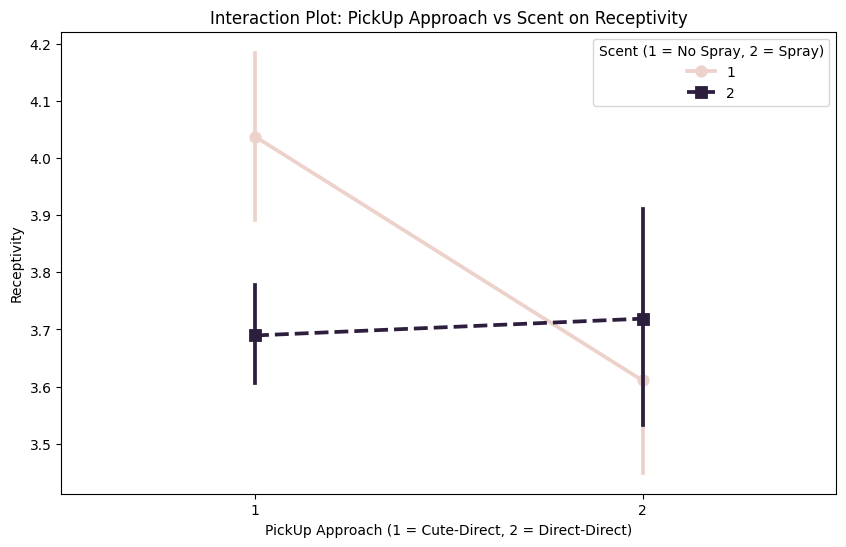

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the interaction plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='PickUp', y='Receptivity', hue='Scent', data=df, 
              markers=["o", "s"], linestyles=["-", "--"])
plt.title('Interaction Plot: PickUp Approach vs Scent on Receptivity')
plt.xlabel('PickUp Approach (1 = Cute-Direct, 2 = Direct-Direct)')
plt.ylabel('Receptivity')
plt.legend(title="Scent (1 = No Spray, 2 = Spray)")
plt.show()


In [11]:
# Perform simple effects analysis for Scent within each PickUp group
simple_effect_scent_within_pickup1 = df[df['PickUp'] == 1].groupby('Scent')['Receptivity'].mean()
simple_effect_scent_within_pickup2 = df[df['PickUp'] == 2].groupby('Scent')['Receptivity'].mean()

# Perform simple effects analysis for PickUp within each Scent group
simple_effect_pickup_within_scent1 = df[df['Scent'] == 1].groupby('PickUp')['Receptivity'].mean()
simple_effect_pickup_within_scent2 = df[df['Scent'] == 2].groupby('PickUp')['Receptivity'].mean()

# Display the results
print("Effect of Scent within each PickUp group:")
print("PickUp=1 (Cute-Direct):", simple_effect_scent_within_pickup1)
print("PickUp=2 (Direct-Direct):", simple_effect_scent_within_pickup2)

print("\nEffect of PickUp within each Scent group:")
print("Scent=1 (No Spray):", simple_effect_pickup_within_scent1)
print("Scent=2 (Spray):", simple_effect_pickup_within_scent2)


Effect of Scent within each PickUp group:
PickUp=1 (Cute-Direct): Scent
1    4.037497
2    3.689371
Name: Receptivity, dtype: float64
PickUp=2 (Direct-Direct): Scent
1    3.610593
2    3.718778
Name: Receptivity, dtype: float64

Effect of PickUp within each Scent group:
Scent=1 (No Spray): PickUp
1    4.037497
2    3.610593
Name: Receptivity, dtype: float64
Scent=2 (Spray): PickUp
1    3.689371
2    3.718778
Name: Receptivity, dtype: float64
